In [70]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [71]:
raw_df = pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [72]:
raw_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [73]:
print("This dataset contains {} rows and {} columns.".format(raw_df.shape[0],raw_df.shape[1]))

This dataset contains 500 rows and 9 columns.


In [74]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [75]:
raw_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [76]:
raw_df.rename(columns = {'Serial No.':'Serial_No.', 'GRE Score': 'GRE_Score', 'TOEFL Score': 'TOEFL_Score', 'University Rating': 'University_Rating','Chance of Admit ': 'Chance_of_Admit'}, inplace = True)

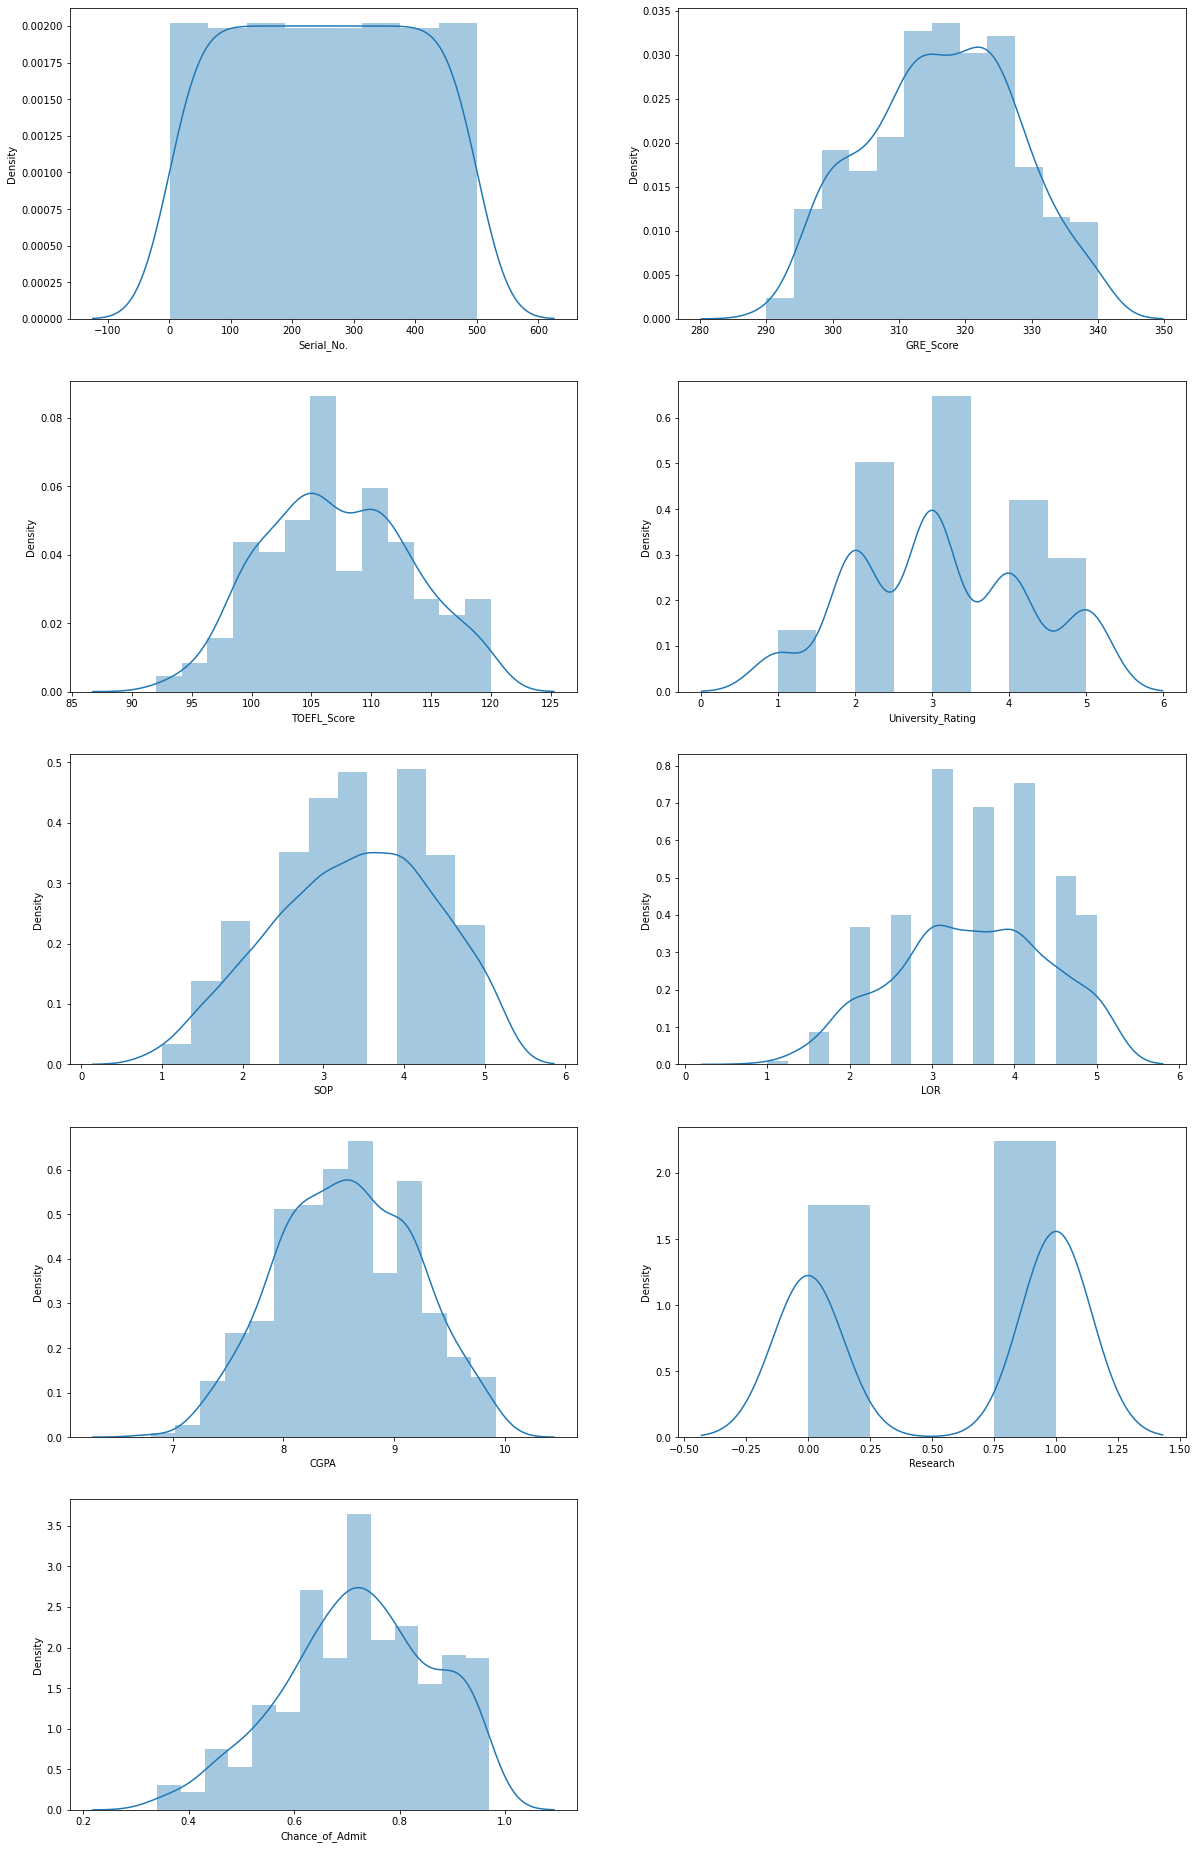

In [77]:
cols = raw_df.columns
plt.figure(figsize=(20,40), facecolor='white')

for i in range(0, len(cols)):
    plt.subplot(6, 2, i+1)
    sns.distplot(x=raw_df[cols[i]],kde=True)
    plt.xlabel(cols[i])

<AxesSubplot:title={'center':'Distribution of Chance of Admit feature'}, xlabel='Chance_of_Admit', ylabel='Density'>

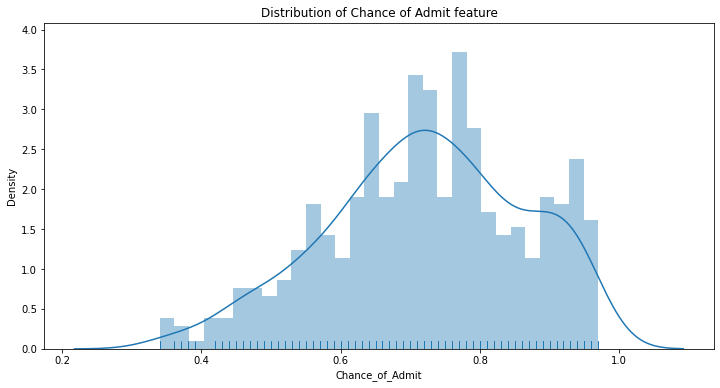

In [78]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Chance of Admit feature')
sns.distplot(raw_df['Chance_of_Admit'],bins = 30,rug=True)

<AxesSubplot:>

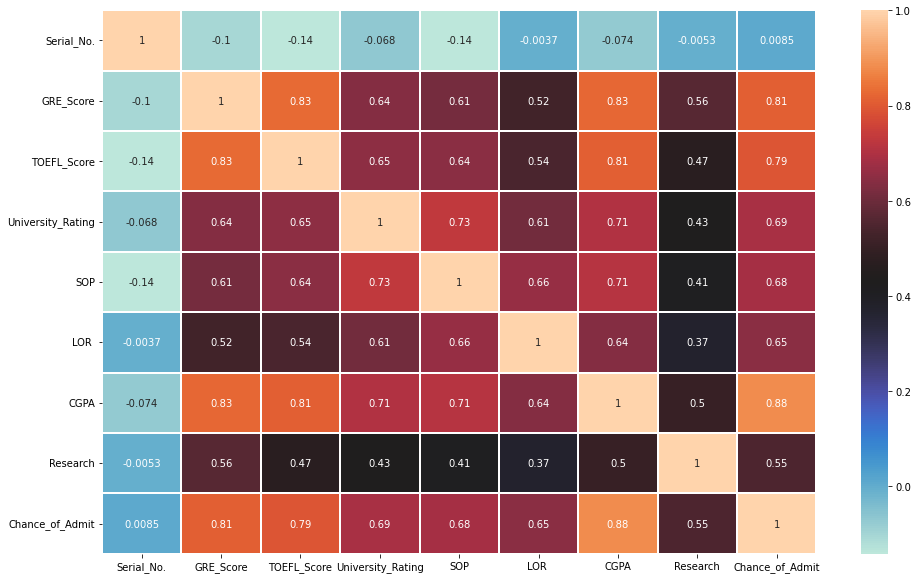

In [79]:
plt.figure(figsize=(16,10))

sns.heatmap(raw_df.corr(),annot=True,cmap='icefire',linewidths=0.2)

In [80]:
X = raw_df.drop('Chance_of_Admit', axis =1) # Independent Features

In [81]:
y = raw_df["Chance_of_Admit"] # Dependent Feature

In [82]:
X.head()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [83]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance_of_Admit, dtype: float64

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
print("Train dataset contains {} rows and {} columns.".format(X_train.shape[0],X_train.shape[1]))

print("Test dataset contains {} rows and {} columns.".format(X_test.shape[0],X_test.shape[1]))

print("Train dataset contains {} rows.".format(y_train.shape[0]))

print("Test dataset contains {} rows.".format(y_test.shape[0]))

Train dataset contains 335 rows and 8 columns.
Test dataset contains 165 rows and 8 columns.
Train dataset contains 335 rows.
Test dataset contains 165 rows.


Feature Scaling

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()

In [89]:
scaler.fit(X_train)

StandardScaler()

In [90]:
print(scaler.mean_)

[255.35820896 316.7641791  107.31343284   3.09552239   3.38059701
   3.50149254   8.58498507   0.56716418]


In [91]:
X_train_scaled = scaler.transform(X_train)

In [92]:
X_train_scaled

array([[ 1.55816388e+00, -5.25174731e-01, -7.06985745e-01, ...,
         5.38819022e-01, -8.35765678e-01, -1.14470294e+00],
       [-1.64243247e+00,  4.77035981e-01,  2.76433873e-01, ...,
        -1.61323061e-03,  3.63045482e-01, -1.14470294e+00],
       [-1.77908715e+00, -7.98504925e-01, -1.03479228e+00, ...,
         5.38819022e-01, -1.15657430e+00, -1.14470294e+00],
       ...,
       [ 6.73504661e-01, -1.34516531e+00, -1.36259882e+00, ...,
        -1.62290999e+00, -2.25407747e+00, -1.14470294e+00],
       [ 1.29923923e+00, -7.07394861e-01, -3.79179206e-01, ...,
         5.38819022e-01, -1.52803691e+00, -1.14470294e+00],
       [-1.09581377e+00, -2.51844537e-01, -2.15275936e-01, ...,
        -1.61323061e-03, -5.65611050e-01, -1.14470294e+00]])

In [93]:
X_test_scaled = scaler.transform(X_test)

In [94]:
X_test_scaled

array([[ 7.67005229e-01,  1.57035676e+00,  1.42375676e+00, ...,
        -1.61323061e-03,  1.61251063e+00,  8.73589088e-01],
       [-1.30439196e+00, -2.51844537e-01,  1.12530603e-01, ...,
         5.38819022e-01,  7.68277423e-01,  8.73589088e-01],
       [ 8.60505796e-01, -1.60734472e-01, -3.79179206e-01, ...,
        -1.08247774e+00, -1.57869090e+00, -1.14470294e+00],
       ...,
       [ 1.24889277e+00, -6.96244077e-02, -7.06985745e-01, ...,
         1.07925128e+00,  2.61737496e-01, -1.14470294e+00],
       [-1.62085542e+00, -6.16284796e-01, -1.36259882e+00, ...,
        -1.62290999e+00, -2.16965415e+00, -1.14470294e+00],
       [ 1.31362393e+00,  2.14856571e-02, -2.15275936e-01, ...,
        -1.61323061e-03, -1.57869090e+00,  8.73589088e-01]])

In [95]:
from sklearn.svm import SVR

In [96]:
SVR_model = SVR(kernel="rbf")

In [97]:
SVR_model.fit(X_train_scaled, y_train)

SVR()

In [98]:
SVR_prediction = SVR_model.predict(X_test_scaled)

In [99]:
SVR_prediction

array([0.85327566, 0.70566642, 0.56577617, 0.68513912, 0.73073652,
       0.84759115, 0.50884113, 0.63512354, 0.71546806, 0.75966639,
       0.57183244, 0.71682881, 0.6228902 , 0.87034528, 0.80538203,
       0.45539152, 0.78034293, 0.51298148, 0.52072102, 0.57781496,
       0.65704711, 0.53857913, 0.7306496 , 0.78872557, 0.69357076,
       0.5926933 , 0.843987  , 0.82839114, 0.59525329, 0.75285329,
       0.56177445, 0.761017  , 0.57579346, 0.84035618, 0.57955442,
       0.7686765 , 0.50127929, 0.88017372, 0.66595737, 0.64142824,
       0.87065485, 0.52080723, 0.63350483, 0.85528765, 0.82310479,
       0.47790267, 0.85620031, 0.74364715, 0.76326758, 0.85361512,
       0.81739371, 0.55214794, 0.6810001 , 0.53159075, 0.90702514,
       0.56836681, 0.83980413, 0.59580852, 0.6745631 , 0.45741035,
       0.59644739, 0.72846957, 0.5933817 , 0.62610304, 0.48959131,
       0.54214166, 0.83976541, 0.8396225 , 0.67509268, 0.69812838,
       0.65151703, 0.79682174, 0.69471546, 0.58558049, 0.51274

In [100]:
#Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [101]:
print(mean_squared_error(y_test,SVR_prediction))

0.004878474514395206


In [102]:
print(mean_absolute_error(y_test,SVR_prediction))

0.05626497201211845


In [103]:
score=r2_score(y_test,SVR_prediction)
score

0.7632199437959383